In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Задание 1. Спрогнозировать продажи по каждому SKU в ассортименте для каждой локации на 3 месяца вперед помесячно

Загрузим данные по поставкам:

In [7]:
df = pd.read_csv('sales.tsv', sep='\t', header=0)

In [8]:
df

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,filling,volume,price
0,2017,1,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,4572.0,NaN
1,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #15,1,Standart,No,Nothing,8028.0,1.221336
2,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #16,3,Standart,No,Nothing,6606.0,2.866401
3,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #22,2,Standart,No,Nothing,11688.0,2.093719
4,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #28,3,Standart,No,Nothing,3582.0,2.866401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2019,6,Pirate Bay,PB,Lollipops,Chupa Chups,sku #97,1,Round,No,Nuts,5790.0,1.316449
1725,2019,6,Village,VL,Chocolates,Ferrero Rocher,sku #30,1,Standart,No,Nothing,394.0,1.251254
1726,2019,6,Village,VL,Chocolates,Ferrero Rocher,sku #46,1,Standart,No,Nothing,197.0,1.251254
1727,2019,6,Village,VL,Chocolates,Toblerone,sku #25,1,Standart,No,Nothing,49.0,1.251254


Как мы видим, данные ограничиваются сведениями за июль 2019г. По условию задания нам необходимо сделать прогноз на период: июль, август, сентябрь 2019г., с сохранением последней цены. Расчитаем таблицу с ценами по каждому товару и локацией, куда он хотя бы когда-то поставлялся: 

In [10]:
def df_add_data(df):
    df_list = []
    
#   проитерируемся по каждому товару и локации из таблицы поставок
    for sku in df.sku_id.unique():
        for ira in df.ira.unique():
#           выделим все поставки для конкретного товара в конкретной локации
            subset = df[df['sku_id'] == sku][df['ira'] == ira]
#           так как не все товары поставлялись во все локациях, применим следующую конструкцию
            try:
                subset.sku_id.values[0]
            except IndexError:
                pass
            else:
#               если товар поставлялся в указанную локацию, то выбераем последний месяц этого события
                last_row = subset.tail(1)
#               переопределяем год на 2019
                last_row['year'] = 2019
#               дублируем строку 3 раза с изменением месяцев
                for month in [7, 8, 9]:
                    lr = last_row.copy()
                    lr['month'] = month
                    lr['volume'] = 'to predict'
                    df_list.append(lr)
    return df_list
# получаем таблицу с данными о товарах на прогнозируемый период            
df_for_predict = pd.concat(df_add_data(df))  

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df_for_predict.to_csv('predict.csv')

In [9]:
df_for_predict

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,filling,volume,price
1667,2019,7,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,to predict,1.276329
1667,2019,8,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,to predict,1.276329
1667,2019,9,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,to predict,1.276329
1688,2019,7,Moon,MN,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,to predict,1.305748
1688,2019,8,Moon,MN,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,to predict,1.305748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,Nothing,to predict,1.263547
1395,2019,9,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,Nothing,to predict,1.263547
1703,2019,7,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,Berries,to predict,1.339017
1703,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,Berries,to predict,1.339017


Объединим сведения о поставках за известный и прогнозируемый период:

In [12]:
df = df.append(df_for_predict, ignore_index=True)

In [14]:
df

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,filling,volume,price
0,2017,1,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,4572,NaN
1,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #15,1,Standart,No,Nothing,8028,1.221336
2,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #16,3,Standart,No,Nothing,6606,2.866401
3,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #22,2,Standart,No,Nothing,11688,2.093719
4,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #28,3,Standart,No,Nothing,3582,2.866401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,Nothing,to predict,1.263547
1986,2019,9,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,Nothing,to predict,1.263547
1987,2019,7,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,Berries,to predict,1.339017
1988,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,Berries,to predict,1.339017


Загрузим сведения о покупателях:

In [13]:
df2 = pd.read_csv('customers.tsv', sep='\t', header=0)
df2

,year,month,ira,customers_type,amount_of_customers
0,2017,1,AC,Archer,679.0
1,2017,1,AC,Monk,1070.0
2,2017,1,AC,Dwarf,610.0
3,2017,1,AC,Centaur,1315.0
4,2017,1,AC,Gremlin,1554.0
...,...,...,...,...,...
1975,2019,9,PB,Unicorn,1896.0
1976,2019,9,PB,Giant,715.0
1977,2019,9,PB,Elf,2477.0
1978,2019,9,PB,Angel,1355.0


Дополним таблицу о поставках данными о покупателях за соответствующий период:

In [15]:
# все категории покупателей
all_customers = df2.customers_type.unique()

In [16]:
def combine_data(df, all_customers):
#   проитерируемся по всем категориям покупателей
    for customer in all_customers:
        customer_list = []
#       проитерируемся по каждой строке в таблице по поставкам
        for index, row in df.iterrows():
            subset = 0
#           в таблице по покупателям выделяем строку для соответствующей категории покупателя 
#           с годом, месяцем и локацией соответствующими строке в таблице по поставкам
            subset = df2[df2['year'] == row['year']]\
                        [df2['month'] == row['month']]\
                        [df2['ira'] == row['ira']]\
                        [df2['customers_type'] == customer]
#           если такая строка существует, то сохраняем ее в массив, иначе сохраняем пустое место
            if subset['amount_of_customers'].values:
                customer_list.append(subset['amount_of_customers'].values[0])
            else:
                customer_list.append(np.nan)
#       в таблице с покупателями создаем колонку для соответствующей категории покупателей
#       и заполняем ее сохраненными сведенями
        new_column = {customer: customer_list}
        df = pd.concat([df, pd.DataFrame(new_column)], axis=1)
    
    return df

Полученные данные сохраним в таблицу combine_data.csv

In [17]:
combine_data(df, all_customers).to_csv('combine_data.csv')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


Полученный объединенный датасет:

In [113]:
df = pd.read_csv('combine_data.csv', header=0, index_col=0)

In [114]:
df

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,...,Goblin,Orc,Gargoyle,Pegasus,Pirate,Unicorn,Giant,Elf,Angel,other
0,2017,1,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,...,399.0,2523.0,1268.0,1027.0,17465.0,2501.0,871.0,5882.0,1527.0,8549.0
1,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #15,1,Standart,No,...,399.0,2523.0,1268.0,1027.0,17465.0,2501.0,871.0,5882.0,1527.0,8549.0
2,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #16,3,Standart,No,...,399.0,2523.0,1268.0,1027.0,17465.0,2501.0,871.0,5882.0,1527.0,8549.0
3,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #22,2,Standart,No,...,399.0,2523.0,1268.0,1027.0,17465.0,2501.0,871.0,5882.0,1527.0,8549.0
4,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #28,3,Standart,No,...,399.0,2523.0,1268.0,1027.0,17465.0,2501.0,871.0,5882.0,1527.0,8549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,...,515.0,1103.0,932.0,804.0,17410.0,1897.0,1868.0,2726.0,1745.0,10084.0
1986,2019,9,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #60,1,Standart,No,...,534.0,948.0,824.0,798.0,15752.0,1896.0,715.0,2477.0,1355.0,8062.0
1987,2019,7,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,...,553.0,1026.0,908.0,705.0,21231.0,2191.0,885.0,3043.0,1584.0,8870.0
1988,2019,8,Pirate Bay,PB,Chocolates,Ferrero Rocher,sku #105,1,Square,No,...,515.0,1103.0,932.0,804.0,17410.0,1897.0,1868.0,2726.0,1745.0,10084.0


Разделим датасет на две части: по которой будем обучать модель и по которой делать прогноз. Делить будем по дате июль 2019 года.

In [115]:
df_to_fit = df[(df['year'] - 2017) * 12 + df['month'] < (2019 - 2017) * 12 + 7]
df_to_predict = df[(df['year'] - 2017) * 12 + df['month'] >= (2019 - 2017) * 12 + 7]

Проанализируем данных в таблице для обучения модели

Начнем с типов данных:

In [116]:
df_to_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 1728
Data columns (total 33 columns):
year                1729 non-null int64
month               1729 non-null int64
location            1729 non-null object
ira                 1729 non-null object
product_category    1729 non-null object
brand               1729 non-null object
sku_id              1729 non-null object
item_per_bundle     1729 non-null int64
shape               1729 non-null object
with_alcohol        1729 non-null object
filling             1729 non-null object
volume              1729 non-null object
price               1617 non-null float64
Archer              1694 non-null float64
Monk                1694 non-null float64
Dwarf               1694 non-null float64
Centaur             1694 non-null float64
Gremlin             1694 non-null float64
Genie               1694 non-null float64
Demon               1694 non-null float64
Ghost               1694 non-null float64
Minotaur            1694 n

Так как нам необходимо прогнозировать количество товаров для поставки, то целевым признаком будет являться volume. Эта колонка имеет тип object, что необходимо исправить на вещественное значение. Как мы видим колонки year, month, item_per_byndle имеют тип float64, то есть будут восприниматься моделью как вещественный признак, я же считаю, что целесообразней анализировать их как категориальные признаки. Внесем изменения:

In [117]:
df_to_fit['year'] = df_to_fit['year'].astype(object)
df_to_fit['month'] = df_to_fit['month'].astype(object)
df_to_fit['item_per_bundle'] = df_to_fit['item_per_bundle'].astype(object)
df_to_fit['volume'] = df_to_fit['volume'].astype('float64')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

Для анализа пропущенных значений в наших данных, напишем метод который будет возвращать название колонки, количество пропусков и их % от общего количества значений в колонке.

In [118]:
def missing_values_table(df):
        # Общее количество пропусков
        mis_val = df.isnull().sum()
        
        # процент пропусков
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # составление таблицы
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # именование колонок
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # сортировка значений
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # вывод общей информации
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [119]:
missing_values_table(df_to_fit)

Your selected dataframe has 33 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
price,112,6.5
Goblin,35,2.0
Angel,35,2.0
Elf,35,2.0
Giant,35,2.0
Unicorn,35,2.0
Pirate,35,2.0
Pegasus,35,2.0
Gargoyle,35,2.0
Orc,35,2.0


Как мы видим, 6.5% значений в колонке price - отсутствуют. Это связано качеством предоставленных нам сведений. Посмотрим что мы сможем сделать.
Для начала заменим пропуски на 0, так как работать np.nan неочень удобно.

In [120]:
df_to_fit['price'] = df_to_fit['price'].fillna(0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Определим товары без цен:

In [121]:
sku_without_price = df_to_fit[df_to_fit['price'] == 0].sku_id.unique()
sku_without_price

array(['sku #79', 'sku #78', 'sku #81', 'sku #82', 'sku #83', 'sku #84',
       'sku #94', 'sku #106', 'sku #97', 'sku #100'], dtype=object)

Расчитаем стандартное отклонение цены у этих товаров

In [122]:
def show_std_for_price(sku_list):
    for sku in sku_list:
        std = np.std(df_to_fit[df_to_fit['sku_id'] == sku][df_to_fit['price'] > 0]['price'].values)
        print(sku, std)


In [123]:
show_std_for_price(sku_without_price)

sku #79 0.07166223490110009
sku #78 0.06617951720432604
sku #81 0.01005096066584936
sku #82 0.014223057546012989
sku #83 0.01005096066584936
sku #84 0.014223057546012989
sku #94 0.027767404114926602
sku #106 0.05909029956624583
sku #97 0.060697132043195406
sku #100 0.060697132043195406


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Как мы видим цены для этих товаров варьируются в незначительных пределах. Поэтому мы можем заменить пропуски в ценах на средние значения для каждой категории товаров. Эта вставка позволит нам не удалять строки с "битыми" ценами и не сильно ухудшит точность нашего прогноза.

In [124]:
for index, row in df_to_fit.iterrows():
    if row['price'] == 0:
        subset = df_to_fit[df_to_fit['sku_id'] == row['sku_id']][df_to_fit['price'] > 0]
        df_to_fit['price'].values[index] = subset['price'].mean()
        

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Как было показано выше в наших данных отсутствуют сведения для всех категорий покупателей. При подробном анализе данных становится понятно, что в предоставленных нам сведениях по покупателям полностью отсутствует информация по локации Village. Данные по категориям покупателей сильно отличаются в зависимости от локации, поэтому заменить пропуски в них аналогично тому как мы сделали с ценами нельзя. С учетом того пропуски занимают 2% по каждой категории, то я предлагаю просто убрать эти строки из нашей таблицы. Тем самым мы не сможем сделать прогнозы по поставкам в локации Village, но немного улучшим точность по остальным локациям. 

In [125]:
df_to_fit = df_to_fit.dropna()

Так как нам необходимо сделать прогноз по вещественному признаку, значит нам предстоит решить задачу линейной регрессии. Посмотрим на распределения целевого признака:

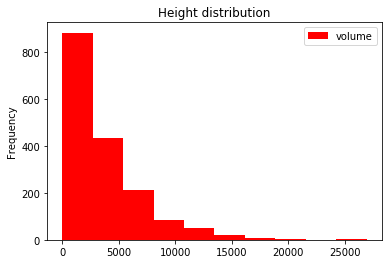

In [126]:
import matplotlib.pyplot as plt
df_to_fit.plot(y='volume', kind='hist', color='red',  title='Height distribution')

Перед нами распределение "с длинным хвостом" с выбросом в районе 25 000. Решать задачу регресси с таким распределением целевого признака неудобно. Поэтому нам необходимо преобразовать целевой признак. Для начала произведем ограничеие нашего целевого признака по 95-й перцентили. Мы потеряем часть редких значений, но позволим нашей модели лучше предсказывать более частые.

In [127]:
max_volume = df_to_fit.volume.quantile(0.95)

In [128]:
filter_1 = df_to_fit['volume'] <= max_volume
df_to_fit.where(filter_1, inplace=True)

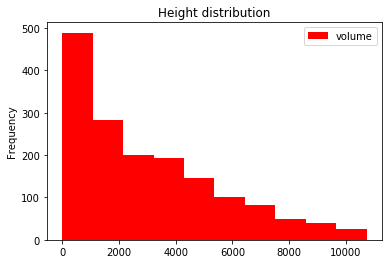

In [129]:
df_to_fit.plot(y='volume', kind='hist', color='red',  title='Height distribution')

In [130]:
df_to_fit = df_to_fit.dropna()

Далее попробуем привести распределение целевого признака к нормальной форме. Для этого применим к значениям признака функцию логорифма:

In [131]:
df_to_fit['norm_volume'] = np.log(df_to_fit['volume'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


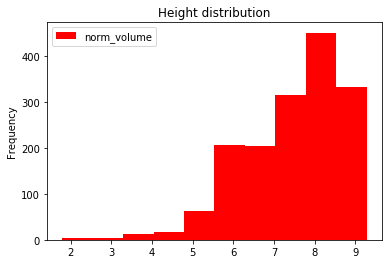

In [132]:
df_to_fit.plot(y='norm_volume', kind='hist', color='red',  title='Height distribution')

Логорифмирование оказало слишком сильное воздействие и теперь у нас наблюдается перекос в "правую" сторону. Вместо логорифмирования применим функцию квадратного корня из значений:

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


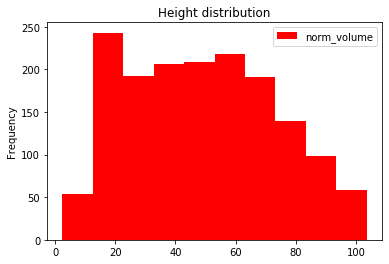

In [133]:
df_to_fit['norm_volume'] = np.power(df_to_fit['volume'], 1/2)
df_to_fit.plot(y='norm_volume', kind='hist', color='red',  title='Height distribution')

Стало ближе к нормальному распределению, но с небольшим перекосом в "левую" сторну. Немного усилим воздействие - применим корень третей степени

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


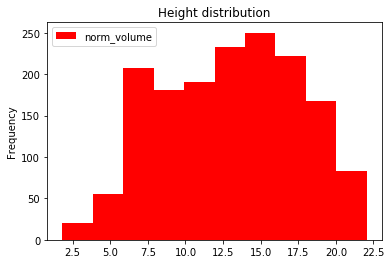

In [134]:
df_to_fit['norm_volume'] = np.power(df_to_fit['volume'], 1/3)
df_to_fit.plot(y='norm_volume', kind='hist', color='red',  title='Height distribution')

Полученное распределение очень близко к нормальному распределению и по нему уже можно решать задачу линейной регрессии. Нам нужно будет обучить модель прогнозировать значения корня третей степени от объема поставок (norm_volume). Оценим корреляцию всех вещественных признаков с целевым

In [135]:
correlations_data = df_to_fit.corr()['norm_volume'].sort_values()
correlations_data

Gremlin       -0.018302
Minotaur      -0.005737
Angel          0.029432
Medusa         0.186650
Giant          0.191915
Orc            0.205947
Demon          0.211807
Goblin         0.220159
Unicorn        0.232248
Monk           0.235560
Pegasus        0.240091
Genie          0.242704
Archer         0.247071
other          0.247498
Elf            0.248257
Centaur        0.249108
Pirate         0.249976
Dwarf          0.252644
Gargoyle       0.255255
Ghost          0.258495
price          0.399830
volume         0.947485
norm_volume    1.000000
Name: norm_volume, dtype: float64

Как мы видим norm_volume сильно коррелирует с истинным целевым признаком volume. Значит мы не ошиблись с выбором "нормирующего" значения. Также Очевидно что категории покупателей Gremlin, Minotaur, Angel практически никак не влияют на целевой признак и являются избыточными.

In [136]:
correlations_data = df_to_fit.corr()['Ghost'].sort_values()
correlations_data

Gremlin       -0.147868
Minotaur      -0.073271
price         -0.049127
Angel          0.095277
volume         0.223922
norm_volume    0.258495
Medusa         0.733028
Giant          0.743561
Demon          0.764942
Goblin         0.794124
Orc            0.814218
Unicorn        0.852100
Monk           0.898912
Pirate         0.910453
other          0.921809
Pegasus        0.924750
Genie          0.947505
Elf            0.949171
Dwarf          0.952817
Centaur        0.955075
Archer         0.956576
Gargoyle       0.966936
Ghost          1.000000
Name: Ghost, dtype: float64

Проанализировав корреляцию между всеми признаками, я пришел к выводу, что категории Gargoyle, Archer, Centaur, Dwarf, Elf, Genie, Pegasus, other, Pirate сильно коррелируют с Ghost и при обучении модели их можно исключить, оставив только Ghost. Тем самым модель лучше сконцентрируется на других признаках.

Посмотрим на зависимость целевого признака от категориальных признаков. Для этого посмотрим графики распределения целевого признака от каждого категориального (location полностью дублируется ira, поэтому оставим только ira):

In [137]:
% pylab inline
def plot_dencity(df, features):
    figsize(6, 5)
    for feature in df[features].unique():
        subset = df[df[features] == feature]
        sns.kdeplot(subset['norm_volume'],label = feature, shade = False, alpha = 0.8)
    plt.xlabel('Volume', size = 20); plt.ylabel('Density', size = 20); 
    plt.title('Density Plot of Volume by ' + features, size = 28);

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


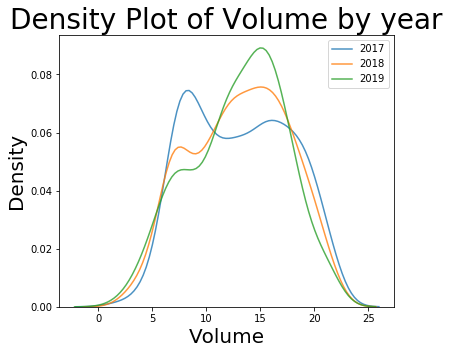

In [138]:
plot_dencity(df_to_fit, 'year')

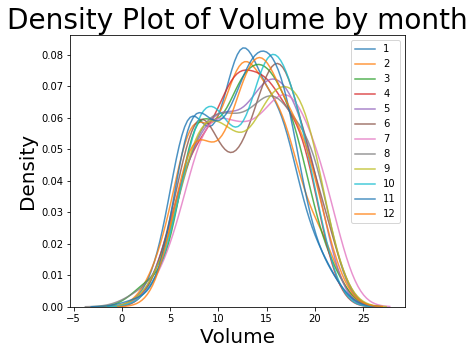

In [139]:
plot_dencity(df_to_fit, 'month')

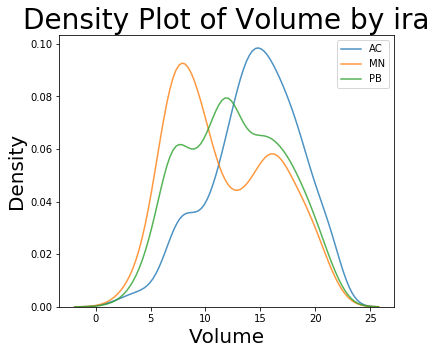

In [140]:
plot_dencity(df_to_fit, 'ira')

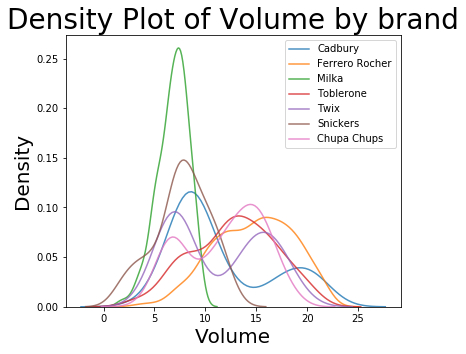

In [141]:
plot_dencity(df_to_fit, 'brand')

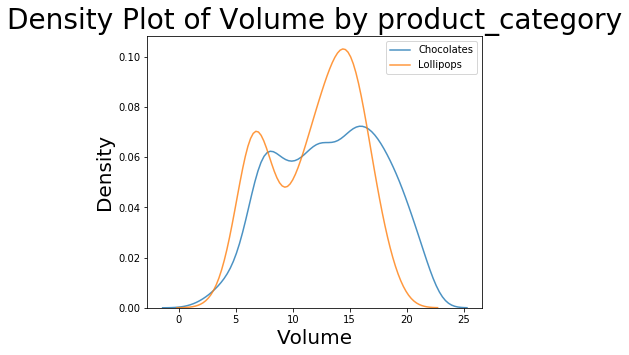

In [142]:
plot_dencity(df_to_fit, 'product_category')

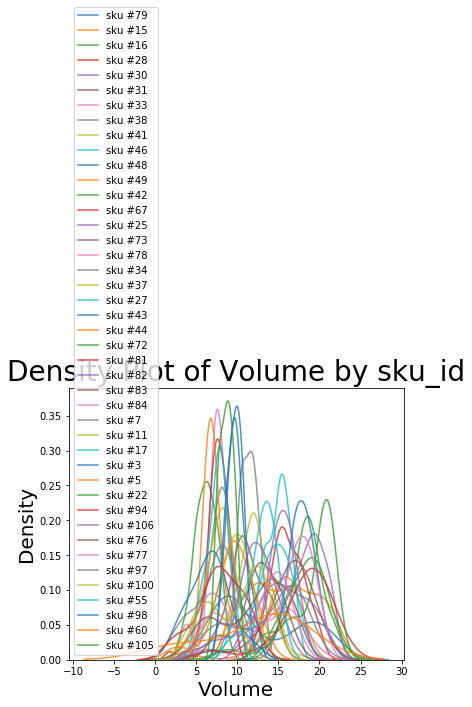

In [143]:
plot_dencity(df_to_fit, 'sku_id')

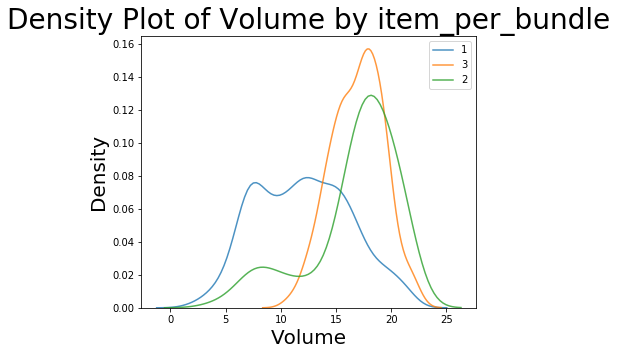

In [144]:
plot_dencity(df_to_fit, 'item_per_bundle')

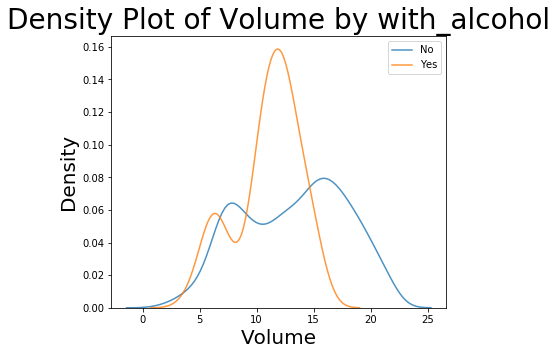

In [145]:
plot_dencity(df_to_fit, 'with_alcohol')

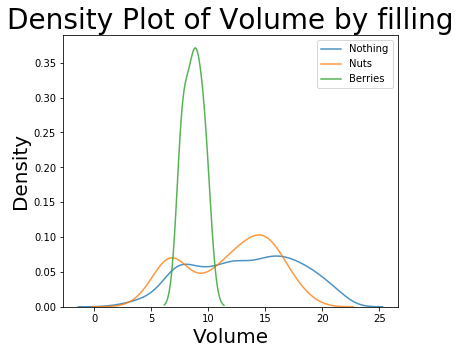

In [146]:
plot_dencity(df_to_fit, 'filling')

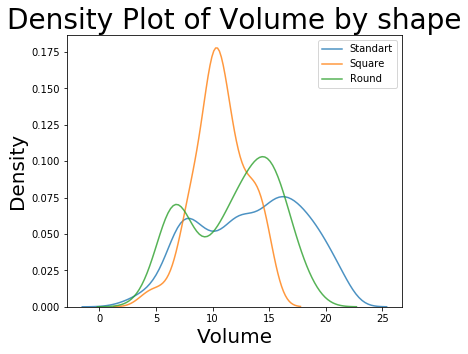

In [147]:
plot_dencity(df_to_fit, 'shape')

Слабее всех влияние имеет признак product_category его мы исключим. Далее мы будем нормировать, кодировать значения признаков, поэтому для идентичности манипуляций объединим таблицы для обучения модели и для прогноза

In [148]:
# исключаем значения с пропусками
df_to_predict = df_to_predict.dropna()

Выделим сразу значения целевого признака (norm_volume) и истинного целевого признака (volume)

In [149]:
target = df_to_fit['norm_volume']
true_target = df_to_fit['volume']

In [150]:
df_big = pd.concat([df_to_fit, df_to_predict], ignore_index=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [151]:
df_big

,Angel,Archer,Centaur,Demon,Dwarf,Elf,Gargoyle,Genie,Ghost,Giant,...,month,norm_volume,other,price,product_category,shape,sku_id,volume,with_alcohol,year
0,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,16.597222,8549.0,1.239302,Chocolates,Standart,sku #79,4572,No,2017
1,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,20.023306,8549.0,1.221336,Chocolates,Standart,sku #15,8028,No,2017
2,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,18.763457,8549.0,2.866401,Chocolates,Standart,sku #16,6606,No,2017
3,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,15.300602,8549.0,2.866401,Chocolates,Standart,sku #28,3582,No,2017
4,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,18.134791,8549.0,1.221336,Chocolates,Standart,sku #30,5964,No,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,1745.0,173.0,1097.0,269.0,377.0,2726.0,932.0,1179.0,599.0,1868.0,...,8,NaN,10084.0,1.263547,Chocolates,Standart,sku #60,to predict,No,2019
1854,1355.0,233.0,830.0,250.0,332.0,2477.0,824.0,1280.0,596.0,715.0,...,9,NaN,8062.0,1.263547,Chocolates,Standart,sku #60,to predict,No,2019
1855,1584.0,202.0,987.0,317.0,365.0,3043.0,908.0,1376.0,667.0,885.0,...,7,NaN,8870.0,1.339017,Chocolates,Square,sku #105,to predict,No,2019
1856,1745.0,173.0,1097.0,269.0,377.0,2726.0,932.0,1179.0,599.0,1868.0,...,8,NaN,10084.0,1.339017,Chocolates,Square,sku #105,to predict,No,2019


Исключим избыточные вещественные признаки

In [152]:
df_to_feature = df_big.drop(columns=['Gremlin', 'Minotaur', 'Angel', 'Centaur', 'Dwarf', 'Gargoyle', 'Pegasus', 'Archer', 'Genie', 'Elf', 'other', 'Pirate'])

Отделим значения целевого и истинного признаков

In [153]:
df_to_feature = df_to_feature.drop(columns=['volume', 'norm_volume'])

Произведем one-hot-coding категориальных признаков

In [154]:
numeric_subset = df_to_feature.select_dtypes('number')
categorical_subset = df_to_feature[['ira', 'sku_id', 'brand', 'with_alcohol', 'filling','year', 'month', 'item_per_bundle', 'shape']]
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)


In [155]:
features

,Demon,Ghost,Giant,Goblin,Medusa,Monk,Orc,Unicorn,price,ira_AC,...,month_9,month_10,month_11,month_12,item_per_bundle_1,item_per_bundle_2,item_per_bundle_3,shape_Round,shape_Square,shape_Standart
0,575.0,1006.0,871.0,399.0,441.0,1070.0,2523.0,2501.0,1.239302,1,...,0,0,0,0,1,0,0,0,0,1
1,575.0,1006.0,871.0,399.0,441.0,1070.0,2523.0,2501.0,1.221336,1,...,0,0,0,0,1,0,0,0,0,1
2,575.0,1006.0,871.0,399.0,441.0,1070.0,2523.0,2501.0,2.866401,1,...,0,0,0,0,0,0,1,0,0,1
3,575.0,1006.0,871.0,399.0,441.0,1070.0,2523.0,2501.0,2.866401,1,...,0,0,0,0,0,0,1,0,0,1
4,575.0,1006.0,871.0,399.0,441.0,1070.0,2523.0,2501.0,1.221336,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,269.0,599.0,1868.0,515.0,398.0,315.0,1103.0,1897.0,1.263547,0,...,0,0,0,0,1,0,0,0,0,1
1854,250.0,596.0,715.0,534.0,540.0,334.0,948.0,1896.0,1.263547,0,...,1,0,0,0,1,0,0,0,0,1
1855,317.0,667.0,885.0,553.0,386.0,348.0,1026.0,2191.0,1.339017,0,...,0,0,0,0,1,0,0,0,1,0
1856,269.0,599.0,1868.0,515.0,398.0,315.0,1103.0,1897.0,1.339017,0,...,0,0,0,0,1,0,0,0,1,0


Далее произведем нормироку наших признаков

In [156]:
features = features.values

In [157]:
means, stds = [np.mean(features, axis=0), np.std(features, axis=0)]

In [158]:
def normalize_features(X):
    for i in range(0, X.shape[0]):
        for j in range(0, X.shape[1]):
            X[i][j] = (X[i][j] - means[j])/stds[j]
    return X

In [159]:
features = normalize_features(features)

Для обучения модели я планирую использовать мини-батч градиентный спуск. Поэтому компенсируем значение w0 веса - добавим столбец из 1:

In [160]:
features = np.hstack((features, np.ones((len(features), 1))))

Разделим признаки на категории для обучения и прогноза:

In [161]:
features_to_fit = features[:1609]
features_to_predict = features[1609:]

Так как наша таблица для обучения отсортирована, а это негативно скажется на обучении модели, то нам необходимо "склеить" столбцы target, true_target с признаками и перемешать их вместе, а после снова разделить.

In [162]:
data = np.concatenate((features_to_fit, target.values.reshape((features_to_fit.shape[0], 1))), axis=1)

In [163]:
data_all = np.concatenate((data, true_target.values.reshape((features_to_fit.shape[0], 1))), axis=1)

In [164]:
df_temp = pd.DataFrame(data_all)

In [165]:
df_temp = df_temp.sample(frac=1)

In [166]:
df_temp

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
183,-0.558303,-0.437638,-0.004900,0.085713,-0.084628,-0.563255,-0.318178,-0.518317,-0.551648,-0.737014,...,-0.249642,0.514593,-0.334528,-0.349257,-0.389732,4.237828,-2.101645,1.0,9.986649,996.0
917,1.632187,1.723610,2.262254,1.943982,1.568979,1.396608,1.064377,1.485997,-0.483288,1.356827,...,-0.249642,0.514593,-0.334528,-0.349257,-0.389732,-0.235970,0.475818,1.0,12.645239,2022.0
488,0.330380,0.821524,-0.196511,0.222099,0.177387,0.702490,0.771386,0.137230,1.067789,1.356827,...,-0.249642,-1.943283,2.989286,-0.349257,-0.389732,-0.235970,0.475818,1.0,21.788609,10344.0
101,0.169647,0.621843,0.256641,0.182320,0.014356,0.559583,0.923604,0.298479,1.994298,1.356827,...,-0.249642,-1.943283,-0.334528,2.863218,-0.389732,-0.235970,0.475818,1.0,17.679513,5526.0
1130,-0.449376,-0.259101,-0.407702,0.188003,0.247258,-0.502009,-0.433772,-0.224451,-0.462369,-0.737014,...,-0.249642,0.514593,-0.334528,-0.349257,2.565867,-0.235970,-2.101645,1.0,9.739963,924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.635349,-0.602081,-0.193713,-0.062040,0.474338,-0.293774,0.385689,-0.274182,-0.577570,-0.737014,...,-0.249642,0.514593,-0.334528,-0.349257,-0.389732,-0.235970,0.475818,1.0,13.298800,2352.0
1562,3.586227,1.404121,0.578322,1.227951,0.817869,2.995120,0.991129,1.220765,1.263872,1.356827,...,-0.249642,-1.943283,2.989286,-0.349257,-0.389732,-0.235970,0.475818,1.0,18.098228,5928.0
932,-0.700439,-0.933316,-0.983931,-1.363396,-1.569380,-0.940937,-1.289857,-1.279353,2.408942,-0.737014,...,-0.249642,-1.943283,-0.334528,2.863218,-0.389732,-0.235970,0.475818,1.0,19.688507,7632.0
698,0.253334,0.870857,0.246850,0.335755,0.934320,0.720863,1.470675,0.194496,-0.540812,1.356827,...,-0.249642,0.514593,-0.334528,-0.349257,-0.389732,-0.235970,0.475818,1.0,12.854391,2124.0


In [167]:
target = df_temp[89].values
true_target = df_temp[90].values

In [168]:
features = df_temp.drop(columns=[89, 90])

In [169]:
features = features.values

Для оценки метрик качества модели будем использовать способ отложенной выбоки. Для этого разделим признаки и целевое значение на тренировочные и тестовые в соотношении 70% к 30%. Обучать модель будем на тренировочной, а считать метрики на тестовой выборке.

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

Произведем мини-батч градиентный спуск. Будем эпохами разделять выборку на батчи и расчитывать градиент для батча. Это позволит сократить количество вычислений и несильно отразится на точности. 

In [171]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [172]:
def gradient_step(X, y, w):
    return  np.dot(2/len(y) * X.T, np.add(linear_prediction(X, w), - y))

In [173]:
size = features.shape[1]

In [174]:
def gradient_descent(X, y, w_init, lr, epoch_num):
    weight_dist = np.inf
    w = w_init
    iter_num = 0
    # Склеим матрицу признаков со столбцом из значений целевого признака
    data = np.concatenate((X, y.reshape(len(y), 1)), axis=1)
    # Основной цикл
    for i in range(epoch_num):
        # Перемешаем данные
        np.random.shuffle(data)
        # Разделим таблицу признаков и целевой признак
        X = np.delete(data, size, axis=1)
        y = np.delete(data, range(size), axis=1).reshape(1, len(y))[0]
        # Пройдемся по датасету batch-ами
        batch_size = 1000
        for batch_idx in range(int(len(y) / batch_size) + 1):
            start_idx = batch_idx * batch_size
            end_idx = start_idx + batch_size
            batch = X[start_idx:end_idx]
            y_batch = y[start_idx:end_idx]
            # вычисляем градиент
            grad = gradient_step(batch, y_batch, w)
            # обновляем параметры
            w = w - lr * grad
        
    return w

Произведем вычисления и сохраним значения коэффициентов (весов)

In [175]:
weights = gradient_descent(X_train, y_train, np.zeros(size), lr=0.01, epoch_num=100)

Оценивать качество прогнозов модели будем по метрикам SMAPE и R2

In [176]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [177]:
def determination(X, y, w):
    return 1 - (sum((y - np.dot(X, w))**2) / sum((y - np.mean(y, axis=0))**2))

In [178]:
smape(y_test, linear_prediction(X_test, weights))

16.642526939032884

In [179]:
determination(X_test, y_test, weights)

0.6915788002877337

Библиотека sklearn предоставляет нам широкий набор инструментов для решения задач линейной регрессии. Воспользуемся одним из них и сравним с нашей моделью.

In [180]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False, normalize=False).fit(X_train, y_train)

In [181]:
y_pred = reg.predict(X_test)
smape(y_test, y_pred)

15.265556340657175

In [182]:
determination(X_test, y_test, reg.coef_)

0.7380138900818574

Качество нашей модели оказалось несколько хуже, чем модель sklearn. Поэтому для прогнозирования поставок будем пользоваться коэффициентами reg.coef_.

In [183]:
predict_volume = np.power(linear_prediction(features_to_predict, reg.coef_), 3)

Полученный прогноз подставим в таблицу df_to_predict

In [184]:
df_to_predict['volume'] = predict_volume

Так как объем поставок является натуральным числом, то округлим наш прогноз до целой части

In [185]:
df_to_predict['volume'] = round(df_to_predict['volume'], 0)

Посмотрм на предварительные результаты нашей задачи.

In [186]:
df_to_predict = df_to_predict[['year', 'month', 'ira', 'sku_id', 'price', 'volume']].reset_index(drop=True)

In [187]:
df_to_predict

,year,month,ira,sku_id,price,volume
0,2019,7,AC,sku #79,1.276329,5442.0
1,2019,8,AC,sku #79,1.276329,4772.0
2,2019,9,AC,sku #79,1.276329,4521.0
3,2019,7,MN,sku #79,1.305748,1668.0
4,2019,8,MN,sku #79,1.305748,1286.0
...,...,...,...,...,...,...
244,2019,8,PB,sku #60,1.263547,2306.0
245,2019,9,PB,sku #60,1.263547,2637.0
246,2019,7,PB,sku #105,1.339017,954.0
247,2019,8,PB,sku #105,1.339017,677.0


## Задание 2. Найти на тот же период цену, при которой достигался бы максимум выручки

Для решения задачи мы будем гранулировать выборку для каждого SKU в отдельности. Воспользцемся объединенным и отчищенным датасетом из первого задания.

In [188]:
df_big

,Angel,Archer,Centaur,Demon,Dwarf,Elf,Gargoyle,Genie,Ghost,Giant,...,month,norm_volume,other,price,product_category,shape,sku_id,volume,with_alcohol,year
0,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,16.597222,8549.0,1.239302,Chocolates,Standart,sku #79,4572,No,2017
1,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,20.023306,8549.0,1.221336,Chocolates,Standart,sku #15,8028,No,2017
2,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,18.763457,8549.0,2.866401,Chocolates,Standart,sku #16,6606,No,2017
3,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,15.300602,8549.0,2.866401,Chocolates,Standart,sku #28,3582,No,2017
4,1527.0,679.0,1315.0,575.0,610.0,5882.0,1268.0,4899.0,1006.0,871.0,...,1,18.134791,8549.0,1.221336,Chocolates,Standart,sku #30,5964,No,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,1745.0,173.0,1097.0,269.0,377.0,2726.0,932.0,1179.0,599.0,1868.0,...,8,NaN,10084.0,1.263547,Chocolates,Standart,sku #60,to predict,No,2019
1854,1355.0,233.0,830.0,250.0,332.0,2477.0,824.0,1280.0,596.0,715.0,...,9,NaN,8062.0,1.263547,Chocolates,Standart,sku #60,to predict,No,2019
1855,1584.0,202.0,987.0,317.0,365.0,3043.0,908.0,1376.0,667.0,885.0,...,7,NaN,8870.0,1.339017,Chocolates,Square,sku #105,to predict,No,2019
1856,1745.0,173.0,1097.0,269.0,377.0,2726.0,932.0,1179.0,599.0,1868.0,...,8,NaN,10084.0,1.339017,Chocolates,Square,sku #105,to predict,No,2019


Разделим датасет на две выборки: для обучения модели и прогнозирования

In [189]:
df_to_fit_2 = df_big[(df['year'] - 2017) * 12 + df_big['month'] < (2019 - 2017) * 12 + 7]
df_to_predict_2 = df_big[(df['year'] - 2017) * 12 + df_big['month'] >= (2019 - 2017) * 12 + 7]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Добавим наши спрогнозированные значения:

In [190]:
df_to_predict_2['volume'] = predict_volume
df_to_predict_2['volume'] = round(df_to_predict_2['volume'], 0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Объединим две таблицы

In [191]:
df_big_2 = pd.concat([df_to_fit_2, df_to_predict_2], ignore_index=True)

Далее я объявлю функцию для поиска лучшей цены. Так как я решил искать лучшую цену для каждого товара в отдельности, то я не смогу воспользоваться моделью из первого задания (константные значения для категориальных признаков). Поэтому необходимо обучить новые модели для каждого товара. По результатам этих моделей будем определять наилучшую цену. 

In [192]:
from sklearn.metrics import mean_squared_error
def get_the_best_price(df, sku_list):
    price_change_list = []
    new_price_list = []
    rmse_list = []
#   проитерируемся по всем товарам
    for sku in sku_list:
#       выберем подтаблицу для соответствующего товара
        df_sku = df[df_big_2['sku_id'] == sku]
#       исключим константные признаки
        df_sku = df_sku.drop(columns=['product_category', 'brand', 'sku_id', 'item_per_bundle', 'with_alcohol', 'filling', 'shape', 'location', 'norm_volume'])
#       далее идут аналогичные ходы по манипуляциям с признаками как и в первом задании
        df_sku['volume'] = df_sku['volume'].astype('float64')
        df_sku = df_sku.reset_index(drop=True)
        df_sku_to_predict = df_sku[(df_sku['year'] - 2017) * 12 + df_sku['month'] >= (2019 - 2017) * 12 + 7]
        target_2 = df_sku['volume']
        features_2 = df_sku.drop(columns=['volume'])
        numeric_subset = features_2.select_dtypes('number')
        categorical_subset = features_2[['ira', 'year', 'month']]
        categorical_subset = pd.get_dummies(categorical_subset)
        features_2 = pd.concat([numeric_subset, categorical_subset], axis = 1)
        features_2_to_predict = features_2[df_sku_to_predict.index[0]:]
        data = pd.concat([features_2, target_2], axis=1)
        data = data.sample(frac=1)
        target_2 = data['volume'].values
        features_2 = data.drop(columns=['volume'])
#       обучаем нашу модель
        X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.1, random_state=0)
        reg_2 = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
#       расчитаем среднее отклоение для каждого товара
        rmse = sqrt(mean_squared_error(y_test, reg_2.predict(X_test)))
#       итерируемся по каждой строке в таблице для прогноза
        for index, row in features_2_to_predict.iterrows():
            revenue_list = []
            i = 0
#           для каждой строки будем прогнозировать количество поставок в зависимости от изменения цены 
#            (-15%, -10%, -5%, без изменений, +5%, +10%, +15%) 
            for price_change in [-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15]:
                new_row = row.copy()
                new_row['price'] = row['price'] + row['price'] * price_change
                volume = reg_2.predict(new_row.values.reshape(1, -1))[0]
#               расчитываем выручку
                revenue = new_row['price'] * volume
                temp_list = [price_change, new_row['price'], rmse]
#               если значение выручки выше предыдущего, то сохраняем его
                if revenue > i:
                    revenue_list.append(temp_list)
                    i = revenue
            price_change_list.append(revenue_list[-1][0])
            new_price_list.append(revenue_list[-1][1])
            rmse_list.append(revenue_list[-1][2])
    return [price_change_list, new_price_list, rmse_list]

Полученные значения добавим в нашу таблицу с результатами заданий

In [193]:
df_to_predict['price_change'], df_to_predict['new_price'], rmse = get_the_best_price(df_big_2, df_to_predict.sku_id.unique())

Округлим значения и сохраним результаты задания1 и задания2 в таблицу prediction.csv

In [194]:
df_to_predict['price'] = round(df_to_predict['price'], 2)
df_to_predict['new_price'] = round(df_to_predict['new_price'], 2)

df_to_predict = df_to_predict.reset_index(drop=True)

In [195]:
df_to_predict

,year,month,ira,sku_id,price,volume,price_change,new_price
0,2019,7,AC,sku #79,1.28,5442.0,-0.15,1.08
1,2019,8,AC,sku #79,1.28,4772.0,-0.15,1.08
2,2019,9,AC,sku #79,1.28,4521.0,-0.15,1.08
3,2019,7,MN,sku #79,1.31,1668.0,-0.15,1.11
4,2019,8,MN,sku #79,1.31,1286.0,-0.15,1.11
...,...,...,...,...,...,...,...,...
244,2019,8,PB,sku #60,1.26,2306.0,0.15,1.45
245,2019,9,PB,sku #60,1.26,2637.0,0.15,1.45
246,2019,7,PB,sku #105,1.34,954.0,0.15,1.54
247,2019,8,PB,sku #105,1.34,677.0,0.15,1.54


In [196]:
df_to_predict.to_csv('prediction.csv')

## Задание 3. Обоснование точности прогноза по определению лучшей цены

При выполнении второго задания я специально расчитывал среднее отклонение прогноза для каждого товара. Данная метрика пригодится нам для обоснования точности прогноза. Характеризовать точность определения наибольшей выручки мы будем при помощи 95%-доверительного интервала. 95%-доверительный интервал расчитывается по формуле:
    $$\Large d = +- k*rmse$$ 
k - доверительный множитель
если при построении доверительного интервала используется статистика, имеющая нормальное распределение, то k равен квантилю нормального распределения и придоверительной вероятности 95%, k = 1,96


In [206]:
df_to_predict['rmse'] = rmse
df_to_predict['rmse'] = round(df_to_predict['rmse'], 2)

In [207]:
df_to_predict

,year,month,ira,sku_id,price,volume,price_change,new_price,rmse,min_revenue,max_revenue
0,2019,7,AC,sku #79,1.28,5442.0,-0.15,1.08,1189.84,4592.33,7162.39
1,2019,8,AC,sku #79,1.28,4772.0,-0.15,1.08,1189.84,3868.73,6438.79
2,2019,9,AC,sku #79,1.28,4521.0,-0.15,1.08,1189.84,3597.65,6167.71
3,2019,7,MN,sku #79,1.31,1668.0,-0.15,1.11,1189.84,530.76,3172.20
4,2019,8,MN,sku #79,1.31,1286.0,-0.15,1.11,1189.84,106.74,2748.18
...,...,...,...,...,...,...,...,...,...,...,...
244,2019,8,PB,sku #60,1.26,2306.0,0.15,1.45,3523.19,-1764.93,8452.33
245,2019,9,PB,sku #60,1.26,2637.0,0.15,1.45,3523.19,-1284.98,8932.28
246,2019,7,PB,sku #105,1.34,954.0,0.15,1.54,100.67,1314.13,1624.19
247,2019,8,PB,sku #105,1.34,677.0,0.15,1.54,100.67,887.55,1197.61


Расчитаем границы 95%-доверительного интервала для выручки:

In [208]:
df_to_predict['min_revenue'] = df_to_predict['new_price'] * (df_to_predict['volume'] - df_to_predict['rmse'] * 1.96)

In [209]:
df_to_predict['max_revenue'] = df_to_predict['new_price'] * (df_to_predict['volume'] + df_to_predict['rmse'] * 1.96)

In [210]:
df_to_predict['min_revenue'] = round(df_to_predict['min_revenue'], 2)
df_to_predict['max_revenue'] = round(df_to_predict['max_revenue'], 2)

В таком случае мы можем утверждать, что истиная выручка с 95% вероятностью будет находится в интервале (min_revenue, max_revenue)

In [211]:
df_to_predict

,year,month,ira,sku_id,price,volume,price_change,new_price,rmse,min_revenue,max_revenue
0,2019,7,AC,sku #79,1.28,5442.0,-0.15,1.08,1189.84,3358.71,8396.01
1,2019,8,AC,sku #79,1.28,4772.0,-0.15,1.08,1189.84,2635.11,7672.41
2,2019,9,AC,sku #79,1.28,4521.0,-0.15,1.08,1189.84,2364.03,7401.33
3,2019,7,MN,sku #79,1.31,1668.0,-0.15,1.11,1189.84,-737.14,4440.10
4,2019,8,MN,sku #79,1.31,1286.0,-0.15,1.11,1189.84,-1161.16,4016.08
...,...,...,...,...,...,...,...,...,...,...,...
244,2019,8,PB,sku #60,1.26,2306.0,0.15,1.45,3523.19,-6669.21,13356.61
245,2019,9,PB,sku #60,1.26,2637.0,0.15,1.45,3523.19,-6189.26,13836.56
246,2019,7,PB,sku #105,1.34,954.0,0.15,1.54,100.67,1165.30,1773.02
247,2019,8,PB,sku #105,1.34,677.0,0.15,1.54,100.67,738.72,1346.44


In [205]:
df_to_predict.to_csv('prediction.csv')